## Importações

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extraindo a base

Explicação de o que cada coluna apresentada:

 - ID: Identificação única da ordem de produção.
 - Month: Mês em que a produção foi registrada.
 - Construction: Especificações de construção do tecido, incluindo informações sobre os fios e densidade.
 - Req_Finish_Fabrics: Quantidade de tecido acabado requerida, em unidades específicas.
 - Fabric_Allowance: Margem de tecido extra permitida, geralmente para compensar perdas.
 - Rec_Beam_length(yds): Comprimento recomendado do feixe de tecido, em jardas.
 - assump_crimp%: Porcentagem assumida de ondulação dos fios.
 - act_crimp%: Porcentagem real de ondulação dos fios, medida.
 - Previous_pdn: Produção anterior registrada para essa ordem, possivelmente referente ao estoque ou à ordem de produção anterior.
 - Req_grey_fabric: Quantidade de tecido cinza (não acabado) necessária.
 - Req_beam_length(yds): Comprimento necessário do feixe de tecido, em jardas.
 - Total_pdn_m/c: Produção total registrada pela máquina.
 - Rej_and_cut_Piece: Peças rejeitadas ou cortadas na produção.
 - Total_pdn_per_order: Produção total por ordem.
 - warp_count: Tipo de contagem de urdidura (fio longitudinal).
 - weft_count: Contagem de trama (fio transversal).
 - epi: Densidade de fios longitudinais (ends per inch).
 - ppi: Densidade de fios transversais (picks per inch).

In [35]:
df = pd.read_csv('./fonte/weaving_dataset_full.csv')
display(df.head(2))

,Unnamed: 0,ID,Month,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),assump_crimp%,act_crimp%,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_pdn_m/c,Rej_and_cut_Piece,Total_pdn_per_order,warp_count,weft_count,epi,ppi
0,0,12207-8,January,40+40/2/40/110x80,31300.0,6.0,5752.336,12.5,12.261731581743476,5047,33297.87234,34797.651103,5047.0,0.0,0.0,double,80,110,80
1,1,12207-8,January,40+40/2/40/110x80,31300.0,6.0,5883.568,12.5,64.12041128784438,1952,33297.87234,34797.651103,2111.0,0.0,0.0,double,80,110,80


## Limpeza da base

### Dados Gerais Estatisticos

In [36]:
colunas_numericas = []
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        colunas_numericas.append(column)
display(len(colunas_numericas))
for i, column in enumerate(df.columns):
        print(f'{column}:\n')
        display(df[column].describe())

13

Unnamed: 0:



count    121148.000000
mean      60573.500000
std       34972.559543
min           0.000000
25%       30286.750000
50%       60573.500000
75%       90860.250000
max      121147.000000
Name: Unnamed: 0, dtype: float64

ID:



count      121148
unique       1009
top       13205-1
freq         2806
Name: ID, dtype: object

Month:



count      121148
unique          9
top       January
freq        17894
Name: Month, dtype: object

Construction:



count           121148
unique             128
top       40x40/110x90
freq             40791
Name: Construction, dtype: object

Req_Finish_Fabrics:



count    121148.000000
mean      23257.443359
std       36473.718249
min          50.000000
25%        2100.000000
50%        5733.000000
75%       24900.000000
max      172800.000000
Name: Req_Finish_Fabrics, dtype: float64

Fabric_Allowance:



count    121148.000000
mean          8.231091
std           2.981416
min           5.000000
25%           7.000000
50%           7.000000
75%           8.100000
max          44.000000
Name: Fabric_Allowance, dtype: float64

Rec_Beam_length(yds):



count    121148.000000
mean       3372.570226
std       10368.214823
min           0.000000
25%        1544.163200
50%        2405.920000
75%        2843.360000
max      292116.964000
Name: Rec_Beam_length(yds), dtype: float64

assump_crimp%:



count    121148.000000
mean         13.124107
std           2.794100
min           6.000000
25%          11.400000
50%          14.000000
75%          14.500000
max          40.800000
Name: assump_crimp%, dtype: float64

act_crimp%:



count     121148
unique     28541
top           na
freq       15218
Name: act_crimp%, dtype: object

Previous_pdn:



count     107511
unique      3305
top        TOTAL
freq       22022
Name: Previous_pdn, dtype: object

Req_grey_fabric:



count    121148.000000
mean      24999.190416
std       39203.852571
min          54.347826
25%        2333.333333
50%        6164.516129
75%       26774.193548
max      192427.616927
Name: Req_grey_fabric, dtype: float64

Req_beam_length(yds):



count    121148.000000
mean      26127.696426
std       40899.793252
min          56.473019
25%        2447.401830
50%        6486.217053
75%       28634.643613
max      211997.533212
Name: Req_beam_length(yds), dtype: float64

Total_pdn_m/c:



count    1.075180e+05
mean     3.794107e+03
std      3.724551e+04
min      0.000000e+00
25%      8.170000e+02
50%      1.781000e+03
75%      2.275000e+03
max      1.878576e+06
Name: Total_pdn_m/c, dtype: float64

Rej_and_cut_Piece:



count    121148.000000
mean         15.552027
std         186.629874
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       11353.000000
Name: Rej_and_cut_Piece, dtype: float64

Total_pdn_per_order:



count    121148.000000
mean       1627.604971
std       18501.170618
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      924098.000000
Name: Total_pdn_per_order, dtype: float64

warp_count:



count     121148
unique        10
top           40
freq      103669
Name: warp_count, dtype: object

weft_count:



count    121148.000000
mean         91.730074
std        1423.317329
min          20.000000
25%          40.000000
50%          40.000000
75%          40.000000
max       40140.000000
Name: weft_count, dtype: float64

epi:



count    121148.000000
mean        117.535312
std          12.863301
min          30.000000
25%         110.000000
50%         110.000000
75%         120.000000
max         170.000000
Name: epi, dtype: float64

ppi:



count    121148.000000
mean         84.013232
std           8.762686
min          42.000000
25%          80.000000
50%          90.000000
75%          90.000000
max         110.000000
Name: ppi, dtype: float64

In [37]:
fig_dados = make_subplots(
    rows=len(df.columns), cols=1,
    subplot_titles=[f"Descrição da Coluna: {col}" for col in df.columns]
)

# colunas_numericas = []
# for column in df.columns:
#     if df[column].dtype in ['float64', 'int64']:
#         colunas_numericas.append(column)
# display(len(colunas_numericas))


# fig_dados = make_subplots(
#     rows=len(colunas_numericas), cols=1,
#     subplot_titles=[f"Descrição da Coluna: {col}" for col in colunas_numericas]
# )

for i, column in enumerate(df.columns):
    infos = dict(df[column].describe())

    if len(list(infos.keys())) > 4:
        x = list(infos.keys())
        y = list(infos.values())
        fig_dados.add_trace(
            go.Bar(x=x, y=y, name=column),
            row=i + 1, col=1
        )
    else:
        print(f'{column}:\n')
        display(df[column].describe())

fig_dados.update_layout(
    title='Dados estatísticos por coluna',
    height=300 * len(df.columns), 
    showlegend=False,
)

fig_dados.show()


ID:



count      121148
unique       1009
top       13205-1
freq         2806
Name: ID, dtype: object

Month:



count      121148
unique          9
top       January
freq        17894
Name: Month, dtype: object

Construction:



count           121148
unique             128
top       40x40/110x90
freq             40791
Name: Construction, dtype: object

act_crimp%:



count     121148
unique     28541
top           na
freq       15218
Name: act_crimp%, dtype: object

Previous_pdn:



count     107511
unique      3305
top        TOTAL
freq       22022
Name: Previous_pdn, dtype: object

warp_count:



count     121148
unique        10
top           40
freq      103669
Name: warp_count, dtype: object

In [38]:
df['act_crimp%'] = pd.to_numeric(df['act_crimp%'], errors='coerce')

### Verificação de nulos

In [39]:
print("Tem algum valor nulo na base: ", df.isnull().any().any())

Tem algum valor nulo na base:  True


In [40]:
nulos_por_coluna = df.isnull().sum()

nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]

fig = go.Figure()
fig.add_bar(x=nulos_por_coluna.index, y=nulos_por_coluna.values)
fig.update_layout(
    title='Quantidade de nulos nas colunas que contêm nulos',
    xaxis_title='Coluna',
    yaxis_title='Quantidade de Nulos por Coluna'
)
fig.show()


In [41]:
# Para a coluna de Previous_pdn é possivel deduzir que não houve 
# uma produção anterior para esta ordem, logo é possivel preencher
# os valores nulos com 0.

# Para a coluna Total_pdn_m/c também é possivel preencher com valores 
# nulos, já que ela deveria representar um todo não é bom substituir 
# por uma média ou mediana. Além de que como a coluna 
# Total_pdn_per_order não apresenta valores nulos, irei deduzir que 
# os valores nulos ocorreram exatamente por conta da maquina não 
# ter registrado e por não ser necessário este total.

df = df.fillna(0)

print("Tem algum valor nulo na base: ", df.isnull().any().any())

Tem algum valor nulo na base:  False


# Começo da análise

Nesta analise sera investigado o desperdicio do tecido que foi exercido nesta fabrica.

## Desperdicio Total de Tecido e sua Evolução Pela Linha do Tempo

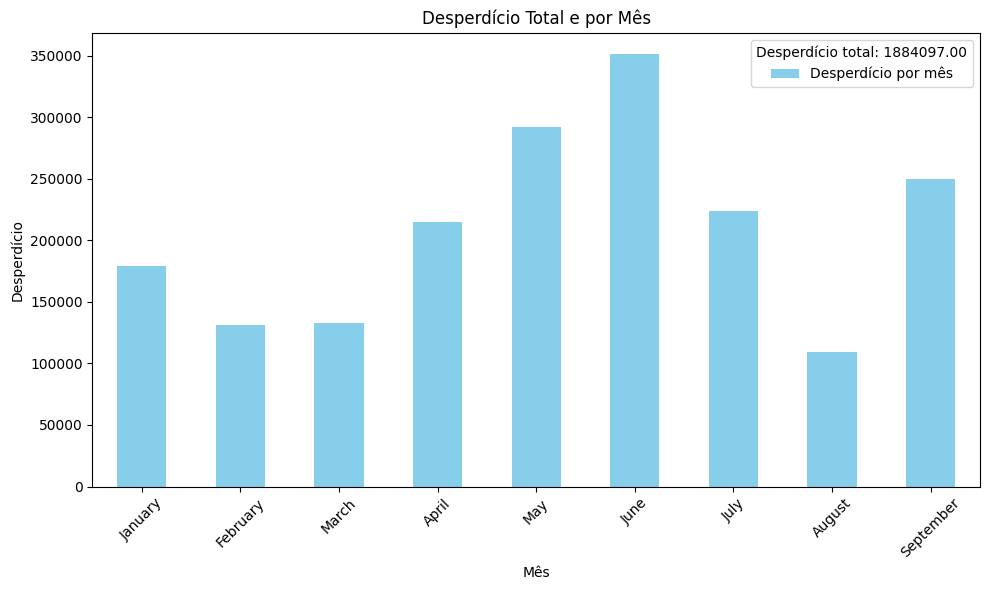

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que a coluna 'Month' seja uma string com o nome do mês
# Converter a coluna 'Month' para datetime para garantir a ordem correta dos meses
df['Month'] = pd.to_datetime(df['Month'], format='%B')

# Calcular desperdício total e por mês
total_desperdicio = df['Rej_and_cut_Piece'].sum()
desperdicio_por_mes = df.groupby('Month')['Rej_and_cut_Piece'].sum()

# Ordenar os meses
desperdicio_por_mes = desperdicio_por_mes.sort_index()

fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de desperdício por mês
desperdicio_por_mes.plot(kind='bar', ax=ax, color='skyblue', label='Desperdício por mês')

# Colocando os titulos do gráfico
ax.set_title('Desperdício Total e por Mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Desperdício')

# Adicionar o total à legenda
ax.legend(title=f'Desperdício total: {total_desperdicio:.2f}')

# Ajustando os rótulos para exibir os meses corretamente
ax.set_xticklabels([month.strftime('%B') for month in desperdicio_por_mes.index], rotation=45)

plt.tight_layout()
plt.show()

## Analise por periodo do ano

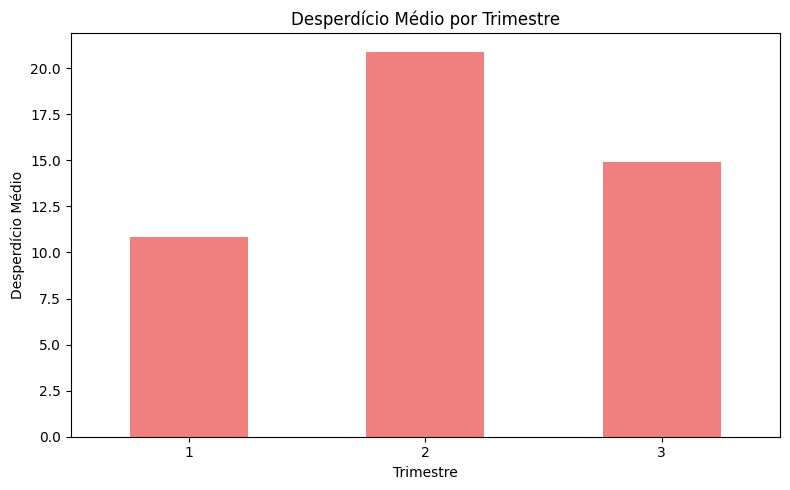

In [50]:
import matplotlib.pyplot as plt

# Criar coluna para o trimestre
df['Trimestre'] = pd.to_datetime(df['Month'], format='%B').dt.quarter

# Calcular desperdício médio por trimestre
desperdicio_por_trimestre = df.groupby('Trimestre')['Rej_and_cut_Piece'].mean()

# Criar gráfico de barras
plt.figure(figsize=(8, 5))

# Gráfico de barras para desperdício médio por trimestre
desperdicio_por_trimestre.plot(kind='bar', color='lightcoral')

# Personalizar o gráfico
plt.title('Desperdício Médio por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Desperdício Médio')
plt.xticks(rotation=0)  # Manter os rótulos dos trimestres legíveis
plt.tight_layout()

# Exibir gráfico
plt.show()

## Percentual de Desperdicio por Ordem

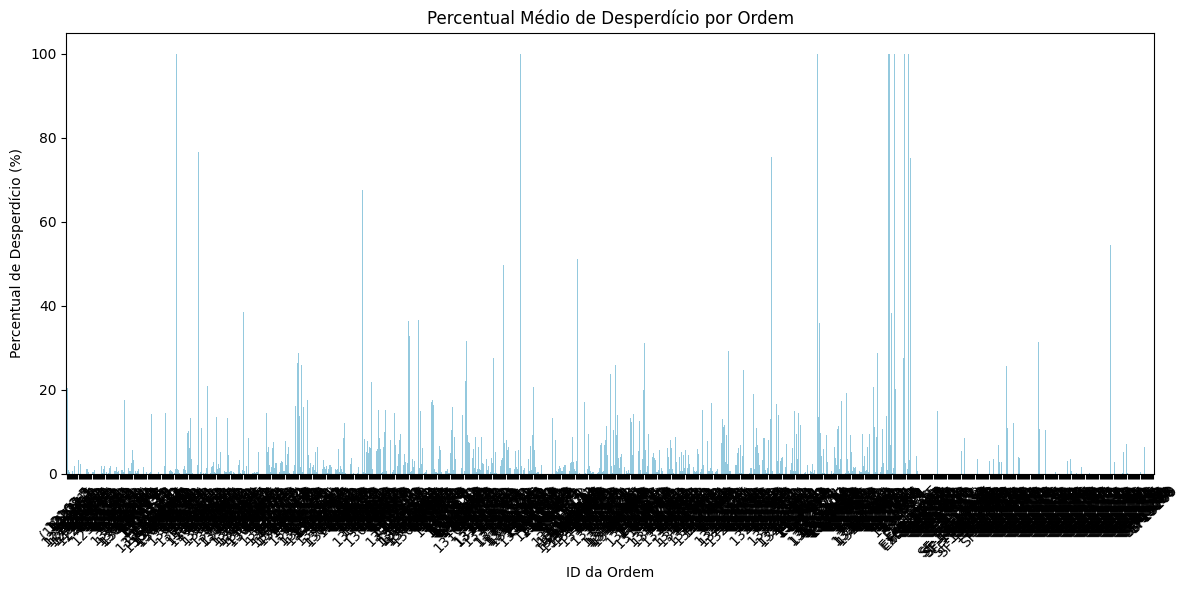

In [43]:
# Calcular percentual de desperdício por ordem
df['Percentual_Desperdicio'] = (df['Rej_and_cut_Piece'] / df['Total_pdn_per_order']) * 100

# Calcular a média do percentual de desperdício por ordem (agrupado por ID)
percentual_por_ordem = df.groupby('ID')['Percentual_Desperdicio'].mean().reset_index()

# Criar gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para percentual de desperdício por ordem
sns.barplot(data=percentual_por_ordem, x='ID', y='Percentual_Desperdicio', color='skyblue')

# Personalizar o gráfico
plt.title('Percentual Médio de Desperdício por Ordem')
plt.xlabel('ID da Ordem')
plt.ylabel('Percentual de Desperdício (%)')
plt.xticks(rotation=45)  # Rotacionar os IDs para facilitar a leitura
plt.tight_layout()

# Exibir gráfico
plt.show()

## Desperdício x Quantidade de Tecido Cinza

Para entender a quantidade de tecido requerido que é perdido

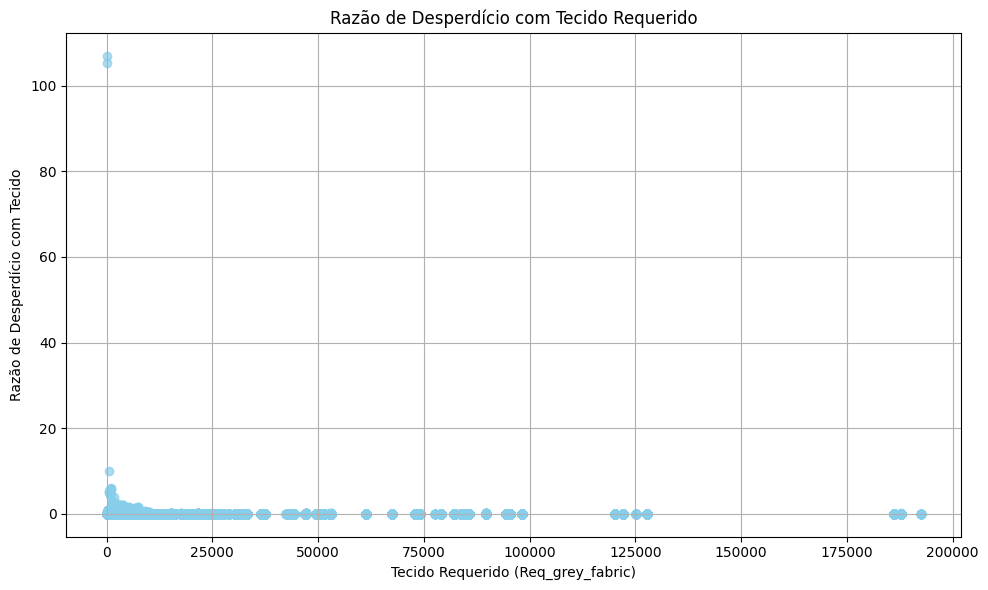

In [44]:
# Calcular razão de desperdício com tecido requerido
df['Razao_Desperdicio_Tecido'] = df['Rej_and_cut_Piece'] / df['Req_grey_fabric']

# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))

# Gráfico de dispersão
plt.scatter(df['Req_grey_fabric'], df['Razao_Desperdicio_Tecido'], color='skyblue', alpha=0.7)

# Personalizar o gráfico
plt.title('Razão de Desperdício com Tecido Requerido')
plt.xlabel('Tecido Requerido (Req_grey_fabric)')
plt.ylabel('Razão de Desperdício com Tecido')
plt.grid(True)

# Exibir gráfico
plt.tight_layout()
plt.show()


## Desperdício Médio por Tipo de Construção

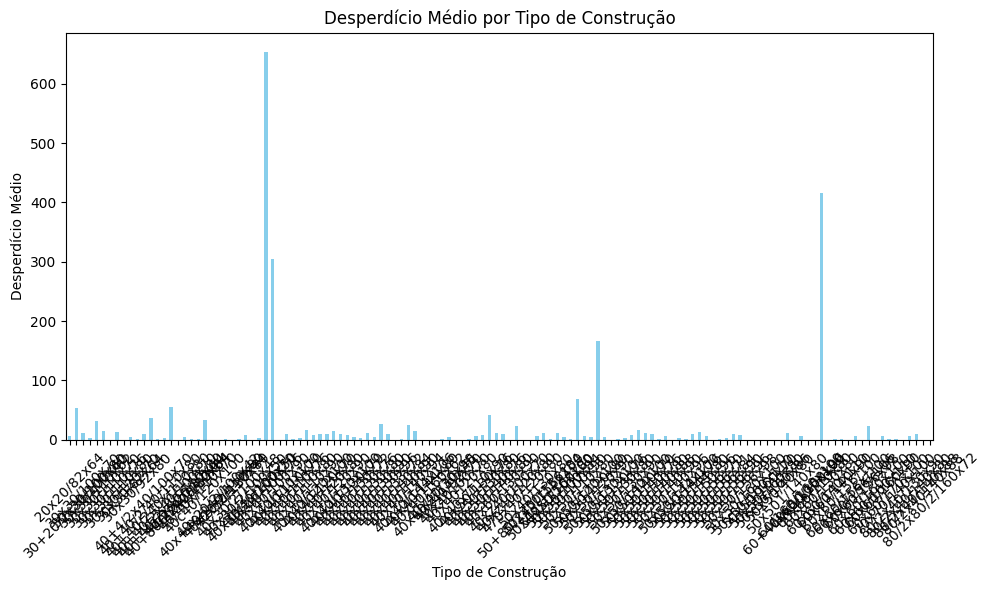

In [45]:
# Calcular desperdício médio por tipo de construção
desperdicio_por_construcao = df.groupby('Construction')['Rej_and_cut_Piece'].mean()

# Criar gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras para desperdício médio por tipo de construção
desperdicio_por_construcao.plot(kind='bar', color='skyblue')

# Personalizar o gráfico
plt.title('Desperdício Médio por Tipo de Construção')
plt.xlabel('Tipo de Construção')
plt.ylabel('Desperdício Médio')
plt.xticks(rotation=45)  # Rotacionar os rótulos das construções para facilitar a leitura
plt.tight_layout()

# Exibir gráfico
plt.show()


## Comparação do Desperdício por Porcentagem de Crimpagem Real e Assumida

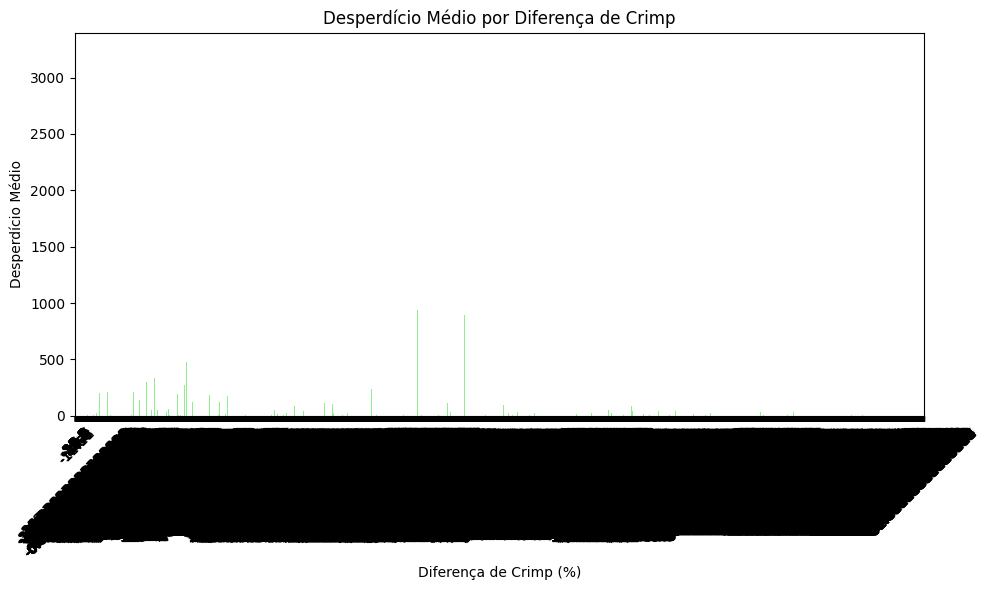

In [46]:
# Calcular a diferença de crimp e desperdício médio por diferença de crimp
df['Diferenca_Crimp'] = df['act_crimp%'].astype(float) - df['assump_crimp%']
desperdicio_por_diferenca_crimp = df.groupby('Diferenca_Crimp')['Rej_and_cut_Piece'].mean()

# Criar gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras para desperdício médio por diferença de crimp
desperdicio_por_diferenca_crimp.plot(kind='bar', color='lightgreen')

# Personalizar o gráfico
plt.title('Desperdício Médio por Diferença de Crimp')
plt.xlabel('Diferença de Crimp (%)')
plt.ylabel('Desperdício Médio')
plt.xticks(rotation=45)  # Rotacionar os rótulos da diferença de crimp para facilitar a leitura
plt.tight_layout()

# Exibir gráfico
plt.show()

## Desperdício por Tipo de Fio

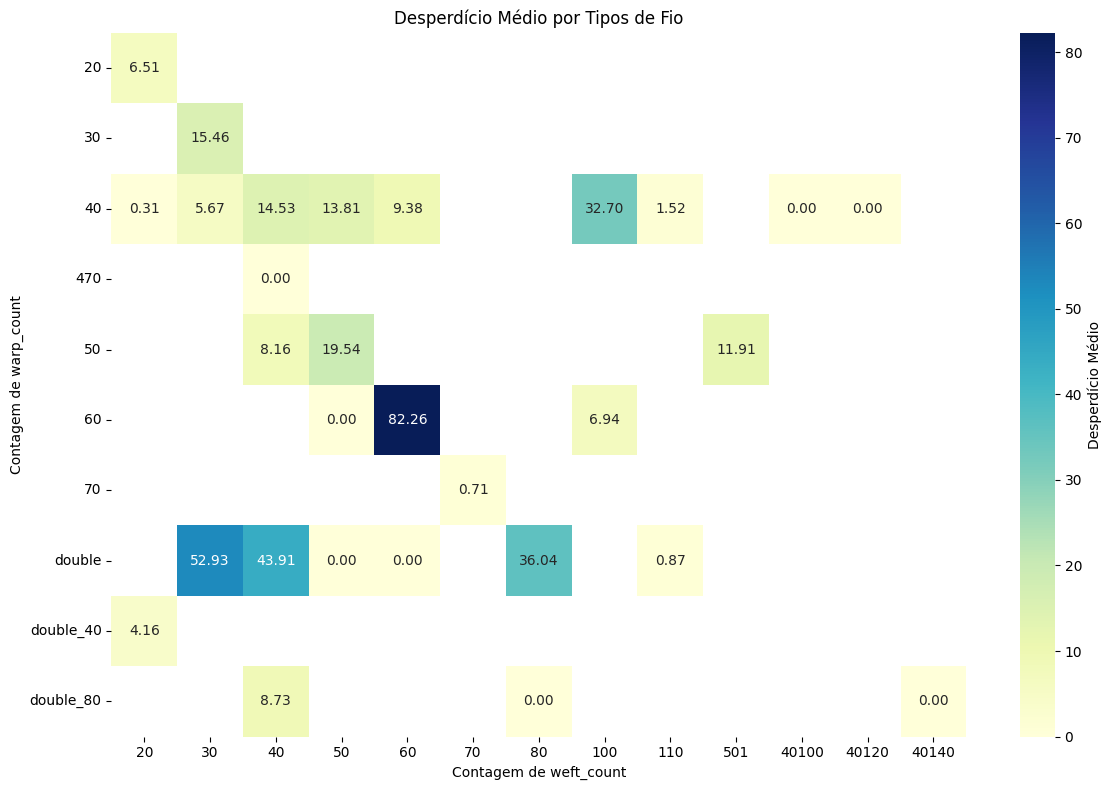

In [48]:
# Calcular desperdício médio por contagem de urdidura e trama
desperdicio_por_fios = df.groupby(['warp_count', 'weft_count'])['Rej_and_cut_Piece'].mean().unstack()

# Criar gráfico de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(desperdicio_por_fios, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Desperdício Médio'})

# Personalizar o gráfico
plt.title('Desperdício Médio por Tipos de Fio')
plt.xlabel('Contagem de weft_count')
plt.ylabel('Contagem de warp_count')
plt.tight_layout()

# Exibir gráfico
plt.show()

## Desperdício e Densidade do Tecido (EPI e PPI)

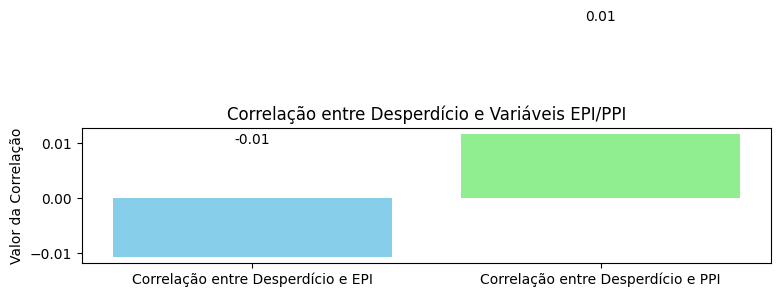

In [49]:
# Cálculo das correlações
correlacao_epi_desp = df['Rej_and_cut_Piece'].corr(df['epi'])
correlacao_ppi_desp = df['Rej_and_cut_Piece'].corr(df['ppi'])

# Criar gráfico de barras para as correlações
correlacoes = [correlacao_epi_desp, correlacao_ppi_desp]
labels = ['Correlação entre Desperdício e EPI', 'Correlação entre Desperdício e PPI']

# Criar gráfico
plt.figure(figsize=(8, 5))

# Gráfico de barras
plt.bar(labels, correlacoes, color=['skyblue', 'lightgreen'])

# Adicionar título e rótulos aos eixos
plt.title('Correlação entre Desperdício e Variáveis EPI/PPI')
plt.ylabel('Valor da Correlação')

# Exibir o valor da correlação em cima das barras
for i, v in enumerate(correlacoes):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

# Exibir gráfico
plt.tight_layout()
plt.show()

## Impacto do Tecido Permitido (Fabric Allowance) no Desperdício

C:\Users\sarahbatista-ieg\AppData\Local\Temp\ipykernel_3452\2165699937.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



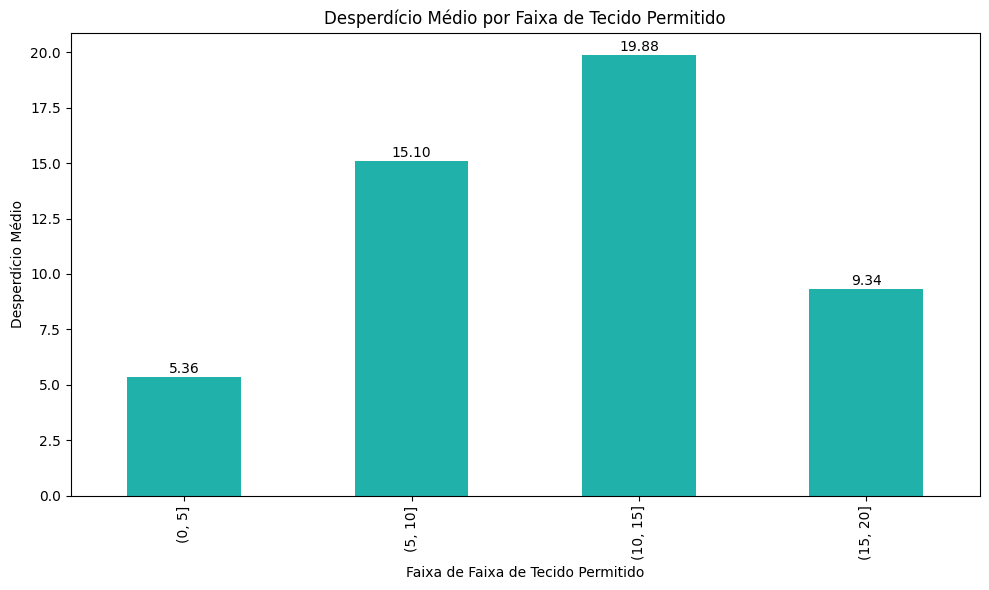

In [54]:
import matplotlib.pyplot as plt

# Calcular desperdício médio para diferentes faixas de Fabric Allowance
df['Faixa_Allowance'] = pd.cut(df['Fabric_Allowance'], bins=[0, 5, 10, 15, 20])
desperdicio_por_allowance = df.groupby('Faixa_Allowance')['Rej_and_cut_Piece'].mean()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
desperdicio_por_allowance.plot(kind='bar', color='lightseagreen')

# Adicionar título e rótulos
plt.title('Desperdício Médio por Faixa de Tecido Permitido')
plt.xlabel('Faixa de Faixa de Tecido Permitido')
plt.ylabel('Desperdício Médio')

# Exibir o valor médio de desperdício sobre cada barra
for i, v in enumerate(desperdicio_por_allowance):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()

## Desperdício por Tipo de Ordem de Produção

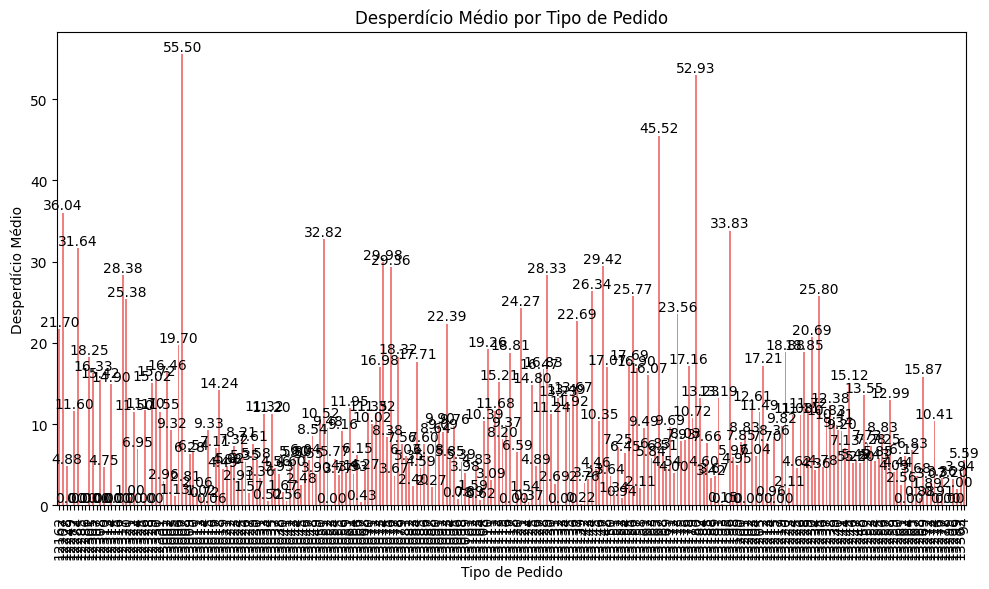

In [55]:
import matplotlib.pyplot as plt

# Agrupar ordens por padrões no ID e calcular o desperdício médio
df['Tipo_Pedido'] = df['ID'].str.extract(r'(\d+)-\d+')[0]  # Extraindo padrão
desperdicio_por_tipo_pedido = df.groupby('Tipo_Pedido')['Rej_and_cut_Piece'].mean()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
desperdicio_por_tipo_pedido.plot(kind='bar', color='lightcoral')

# Adicionar título e rótulos
plt.title('Desperdício Médio por Tipo de Pedido')
plt.xlabel('Tipo de Pedido')
plt.ylabel('Desperdício Médio')

# Exibir o valor médio de desperdício sobre cada barra
for i, v in enumerate(desperdicio_por_tipo_pedido):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()
